### Задание  1 В качестве источника исходных данных предлагается использовать данные сайта магнитогорской недвижимости www.citystar.ru. Задание может выполнено на любом языке любым известным статистическим методом, методом анализа данных или прочими методами на усмотрение исполнителя. По результатам выполнения задачи должен быть написан отчет о результате работы и ходе исследования.

Для оценки исследования в репозитории приложены исходные датасеты

#### Загрузка библиотек

In [161]:
import pandas as pd
import numpy as np
import random
from scipy.stats import mode
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})


Датасет представляет собой 155 наблюдений по признакам представленным ниже. (Id, Тип (жилое) (Type), кол-во комнат(Rooms), район (District), адрес (Agress), этаж(Floor), кол-во этажей в доме (HouseFloor), общая площадь(Square), жилая площадь (LivSquare), площадь кухни (KitSquare), тип окна(Windows), наличие мебели (Furniture), наличие ремонта (Repair), застекление балкона (Balcony glassed), тип санузла (раздельный или совмещенный)(WC), цена (Price)

#### Загрузка и EDA

Загрузим датасет с ценами (156 квартир) и тестовый без цен (12 квартир), затем проведем обработку данных (пропуски, выбросы, изучим целевую переменную, проведем отбор признаков, сгенерируем новую, построим матрицу корреляции, чтобы изучить основные зависимости). Датасет собран мною самостоятельно

In [162]:
df=pd.read_csv('Train-excel.csv',sep=',')
df.head()

,Id,Type,Rooms,District,Adress,Floor,HouseFloor,Square,LivSquare,KitSquare,Windows,Furniture,Repair,Balcony glassed,WC,Price
0,0,Living,1,Орджоникидзевский,Сиреневый проезд 28,4,9,32.4,18.0,9.0,пластик,да,да,NaN,NaN,2050000
1,1,Living,1,Правобережный,"Им. газеты ""Правда"" 62",1,5,32.0,17.0,6.0,пластик,да,да,NaN,NaN,2050000
2,2,Living,1,Ленинский,Строителей 52,3,3,31.0,NaN,NaN,пластик,да,да,да,NaN,2100000
3,3,Living,1,Ленинский,Ленинградская 19,5,5,30.0,NaN,6.0,пластик,NaN,да,NaN,NaN,2050000
4,4,Living,1,Правобережный,Советской Армии 33/1,9,9,30.0,17.0,6.0,пластик,да,да,да,совм,1490000


In [163]:
test_df=pd.read_csv('NoPriceTestExcel.csv',sep=',')
test_df.head()

,Id,Type,Rooms,District,Adress,Floor,HouseFloor,Square,LivSquare,KitSquare,Windows,Furniture,Repair,Balcony glassed,WC
0,0,Living,3,Орджоникидзевский,50-летия Магнитки 31,3,9,99.0,63.5,11.8,пластик,да,да,да,разд
1,1,Living,3,Ленинский,Ленина пр-т 18,3,4,80.6,50.0,10.0,пластик,NaN,да,NaN,совм
2,2,Living,3,Правобережный,Карла Маркса 130,2,5,47.3,22.0,6.0,пластик,да,да,NaN,NaN
3,3,Living,4,Орджоникидзевский,Советская 166/2,5,5,62.0,45.0,6.0,пластик,да,да,NaN,разд
4,4,Living,4,Ленинский,Куйбышева 20,4,4,136.0,80.0,12.0,пластик,да,да,да,совм


In [164]:
df['Id'] = df['Id'].astype(str)

In [165]:
test_df['Id']=test_df['Id'].astype(str)

In [166]:
df.describe()

,Rooms,Floor,HouseFloor,Square,LivSquare,KitSquare,Price
count,156.000000,156.000000,156.000000,156.000000,135.000000,148.000000,1.560000e+02
mean,2.211538,3.647436,6.275641,54.698718,36.272296,9.234054,2.888122e+06
std,0.983802,2.567299,3.049217,20.730411,17.295014,8.125084,1.280661e+06
min,1.000000,1.000000,2.000000,20.600000,10.000000,4.000000,1.000000e+06
25%,1.000000,2.000000,5.000000,41.450000,21.500000,6.000000,2.050000e+06
50%,2.000000,3.000000,5.000000,54.800000,33.500000,8.000000,2.600000e+06
75%,3.000000,5.000000,9.000000,65.000000,45.000000,9.000000,3.312500e+06
max,4.000000,15.000000,16.000000,160.000000,120.000000,81.000000,8.490000e+06


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               156 non-null    object 
 1   Type             156 non-null    object 
 2   Rooms            156 non-null    int64  
 3   District         156 non-null    object 
 4   Adress           156 non-null    object 
 5   Floor            156 non-null    int64  
 6   HouseFloor       156 non-null    int64  
 7   Square           156 non-null    float64
 8   LivSquare        135 non-null    float64
 9   KitSquare        148 non-null    float64
 10  Windows          137 non-null    object 
 11  Furniture        64 non-null     object 
 12  Repair           103 non-null    object 
 13  Balcony glassed  66 non-null     object 
 14  WC               50 non-null     object 
 15  Price            156 non-null    int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 19.6+ KB


In [168]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               13 non-null     object 
 1   Type             13 non-null     object 
 2   Rooms            13 non-null     int64  
 3   District         13 non-null     object 
 4   Adress           13 non-null     object 
 5   Floor            13 non-null     int64  
 6   HouseFloor       13 non-null     int64  
 7   Square           13 non-null     float64
 8   LivSquare        12 non-null     float64
 9   KitSquare        13 non-null     float64
 10  Windows          12 non-null     object 
 11  Furniture        9 non-null      object 
 12  Repair           12 non-null     object 
 13  Balcony glassed  6 non-null      object 
 14  WC               11 non-null     object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.6+ KB


In [169]:
test_idx=test_df['Id']
test_idx.head()

0    0
1    1
2    2
3    3
4    4
Name: Id, dtype: object

#### Обзор категориальных переменных

In [170]:
df_cat_features=df.select_dtypes(include={'object'})
df_cat_features

,Id,Type,District,Adress,Windows,Furniture,Repair,Balcony glassed,WC
0,0,Living,Орджоникидзевский,Сиреневый проезд 28,пластик,да,да,NaN,NaN
1,1,Living,Правобережный,"Им. газеты ""Правда"" 62",пластик,да,да,NaN,NaN
2,2,Living,Ленинский,Строителей 52,пластик,да,да,да,NaN
3,3,Living,Ленинский,Ленинградская 19,пластик,NaN,да,NaN,NaN
4,4,Living,Правобережный,Советской Армии 33/1,пластик,да,да,да,совм
...,...,...,...,...,...,...,...,...,...
151,151,Living,Орджоникидзевский,Труда 35,пластик,да,да,да,совм
152,152,Living,Правобережный,Ленина пр-т 102,пластик,да,да,да,разд
153,153,Living,Орджоникидзевский (левый берег),Красноармейская 5,пластик,да,да,NaN,разд
154,154,Living,Правобережный,Сталеваров 17/2,пластик,да,да,да,совм


Удалим лишние признаки

In [171]:
df.drop('Type',axis=1, inplace=True)
df.drop('Adress',axis=1, inplace=True)
df.drop('Id',axis=1,inplace=True)
df.head()

,Rooms,District,Floor,HouseFloor,Square,LivSquare,KitSquare,Windows,Furniture,Repair,Balcony glassed,WC,Price
0,1,Орджоникидзевский,4,9,32.4,18.0,9.0,пластик,да,да,NaN,NaN,2050000
1,1,Правобережный,1,5,32.0,17.0,6.0,пластик,да,да,NaN,NaN,2050000
2,1,Ленинский,3,3,31.0,NaN,NaN,пластик,да,да,да,NaN,2100000
3,1,Ленинский,5,5,30.0,NaN,6.0,пластик,NaN,да,NaN,NaN,2050000
4,1,Правобережный,9,9,30.0,17.0,6.0,пластик,да,да,да,совм,1490000


In [172]:
test_df.drop('Type',axis=1, inplace=True)
test_df.drop('Adress',axis=1, inplace=True)
test_df.drop('Id',axis=1,inplace=True)
test_df.head()

,Rooms,District,Floor,HouseFloor,Square,LivSquare,KitSquare,Windows,Furniture,Repair,Balcony glassed,WC
0,3,Орджоникидзевский,3,9,99.0,63.5,11.8,пластик,да,да,да,разд
1,3,Ленинский,3,4,80.6,50.0,10.0,пластик,NaN,да,NaN,совм
2,3,Правобережный,2,5,47.3,22.0,6.0,пластик,да,да,NaN,NaN
3,4,Орджоникидзевский,5,5,62.0,45.0,6.0,пластик,да,да,NaN,разд
4,4,Ленинский,4,4,136.0,80.0,12.0,пластик,да,да,да,совм


Признак района очень важный , но его нужно перевести в числовой формат, воспользуемся dummies

In [173]:
pd.get_dummies(df['District'])

,Ленинский,Ленинский(Левый берег),Орджоникидзевский,Орджоникидзевский (левый берег),Правобережный
0,0,0,1,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
151,0,0,1,0,0
152,0,0,0,0,1
153,0,0,0,1,0
154,0,0,0,0,1


In [174]:
df = pd.concat([df, pd.get_dummies(df['District'])], axis=1)
df.drop('District',axis=1,inplace=True)
df.head()

,Rooms,Floor,HouseFloor,Square,LivSquare,KitSquare,Windows,Furniture,Repair,Balcony glassed,WC,Price,Ленинский,Ленинский(Левый берег),Орджоникидзевский,Орджоникидзевский (левый берег),Правобережный
0,1,4,9,32.4,18.0,9.0,пластик,да,да,NaN,NaN,2050000,0,0,1,0,0
1,1,1,5,32.0,17.0,6.0,пластик,да,да,NaN,NaN,2050000,0,0,0,0,1
2,1,3,3,31.0,NaN,NaN,пластик,да,да,да,NaN,2100000,1,0,0,0,0
3,1,5,5,30.0,NaN,6.0,пластик,NaN,да,NaN,NaN,2050000,1,0,0,0,0
4,1,9,9,30.0,17.0,6.0,пластик,да,да,да,совм,1490000,0,0,0,0,1


In [175]:
pd.get_dummies(test_df['District'])

,Ленинский,Ленинский(Левый берег),Орджоникидзевский,Орджоникидзевский (левый берег),Правобережный
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,1,0,0,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,1,0,0,0,0
8,0,0,1,0,0
9,1,0,0,0,0


In [176]:
test_df = pd.concat([test_df, pd.get_dummies(test_df['District'])], axis=1)
test_df.drop('District',axis=1,inplace=True)
test_df.head()

,Rooms,Floor,HouseFloor,Square,LivSquare,KitSquare,Windows,Furniture,Repair,Balcony glassed,WC,Ленинский,Ленинский(Левый берег),Орджоникидзевский,Орджоникидзевский (левый берег),Правобережный
0,3,3,9,99.0,63.5,11.8,пластик,да,да,да,разд,0,0,1,0,0
1,3,3,4,80.6,50.0,10.0,пластик,NaN,да,NaN,совм,1,0,0,0,0
2,3,2,5,47.3,22.0,6.0,пластик,да,да,NaN,NaN,0,0,0,0,1
3,4,5,5,62.0,45.0,6.0,пластик,да,да,NaN,разд,0,0,1,0,0
4,4,4,4,136.0,80.0,12.0,пластик,да,да,да,совм,1,0,0,0,0


#### Обработка пропусков

Пропуски есть в категориальных признаках - заменим их модой, а числовые -медианой

In [177]:
df['Windows'].value_counts()

пластик       132
деревянные      5
Name: Windows, dtype: int64

In [178]:
df.isna().sum()

Rooms                                0
Floor                                0
HouseFloor                           0
Square                               0
LivSquare                           21
KitSquare                            8
Windows                             19
Furniture                           92
Repair                              53
Balcony glassed                     90
WC                                 106
Price                                0
Ленинский                            0
Ленинский(Левый берег)               0
Орджоникидзевский                    0
Орджоникидзевский (левый берег)      0
Правобережный                        0
dtype: int64

In [179]:
df['Furniture'].value_counts()

да    64
Name: Furniture, dtype: int64

In [180]:
df['Repair'].value_counts()

да     95
нет     8
Name: Repair, dtype: int64

In [181]:
df['Balcony glassed'].value_counts()

да     64
нет     2
Name: Balcony glassed, dtype: int64

In [182]:
df['WC'].value_counts()

разд    29
совм    21
Name: WC, dtype: int64

In [183]:
 df['Repair'].mode()[0]

'да'

In [184]:

df['Repair']=df['Repair'].fillna((df['Repair'].mode()[0])) 
df['Windows']=df['Windows'].fillna('пластик')
df['Furniture']=df['Furniture'].fillna('нет')
df['Balcony glassed']=df['Balcony glassed'].fillna('нет')
df['WC']=df['WC'].fillna((df['WC'].mode()[0])) 
df.isna().sum()

Rooms                               0
Floor                               0
HouseFloor                          0
Square                              0
LivSquare                          21
KitSquare                           8
Windows                             0
Furniture                           0
Repair                              0
Balcony glassed                     0
WC                                  0
Price                               0
Ленинский                           0
Ленинский(Левый берег)              0
Орджоникидзевский                   0
Орджоникидзевский (левый берег)     0
Правобережный                       0
dtype: int64

In [185]:
df['Repair'].value_counts()

да     148
нет      8
Name: Repair, dtype: int64

In [186]:
df['Furniture'].value_counts()

нет    92
да     64
Name: Furniture, dtype: int64

In [187]:
df['WC'].value_counts()

разд    135
совм     21
Name: WC, dtype: int64

In [188]:
medians = df[['LivSquare','KitSquare']].median()

In [189]:
df[['LivSquare','KitSquare']]= df[['LivSquare','KitSquare']].fillna(medians)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rooms                            156 non-null    int64  
 1   Floor                            156 non-null    int64  
 2   HouseFloor                       156 non-null    int64  
 3   Square                           156 non-null    float64
 4   LivSquare                        156 non-null    float64
 5   KitSquare                        156 non-null    float64
 6   Windows                          156 non-null    object 
 7   Furniture                        156 non-null    object 
 8   Repair                           156 non-null    object 
 9   Balcony glassed                  156 non-null    object 
 10  WC                               156 non-null    object 
 11  Price                            156 non-null    int64  
 12  Ленинский             

Пропуски обработаны

#### Приведение типов

In [191]:
binary_to_numbers_furn_rep_balc = {'да': 1, 'нет': 0}

df['Furniture'] = df['Furniture'].replace(binary_to_numbers_furn_rep_balc)
df['Repair'] = df['Repair'].replace(binary_to_numbers_furn_rep_balc)
df['Balcony glassed'] = df['Balcony glassed'].replace(binary_to_numbers_furn_rep_balc)

In [192]:
binary_to_numbers_wind={'пластик':1, 'деревянные':0}
df['Windows']=df['Windows'].replace(binary_to_numbers_wind)

In [193]:
binary_to_numbers_WC={'разд':1, 'совм':0}
df['WC']=df['WC'].replace(binary_to_numbers_WC)

In [194]:
df.head()

,Rooms,Floor,HouseFloor,Square,LivSquare,KitSquare,Windows,Furniture,Repair,Balcony glassed,WC,Price,Ленинский,Ленинский(Левый берег),Орджоникидзевский,Орджоникидзевский (левый берег),Правобережный
0,1,4,9,32.4,18.0,9.0,1,1,1,0,1,2050000,0,0,1,0,0
1,1,1,5,32.0,17.0,6.0,1,1,1,0,1,2050000,0,0,0,0,1
2,1,3,3,31.0,33.5,8.0,1,1,1,1,1,2100000,1,0,0,0,0
3,1,5,5,30.0,33.5,6.0,1,0,1,0,1,2050000,1,0,0,0,0
4,1,9,9,30.0,17.0,6.0,1,1,1,1,0,1490000,0,0,0,0,1


#### Подготовка теста

In [195]:
test_df.isna().sum()

Rooms                              0
Floor                              0
HouseFloor                         0
Square                             0
LivSquare                          1
KitSquare                          0
Windows                            1
Furniture                          4
Repair                             1
Balcony glassed                    7
WC                                 2
Ленинский                          0
Ленинский(Левый берег)             0
Орджоникидзевский                  0
Орджоникидзевский (левый берег)    0
Правобережный                      0
dtype: int64

In [196]:
test_df['Repair']=test_df['Repair'].fillna((test_df['Repair'].mode()[0])) 
test_df['Windows']=test_df['Windows'].fillna('пластик')
test_df['Furniture']=test_df['Furniture'].fillna('нет')
test_df['Balcony glassed']=test_df['Balcony glassed'].fillna('нет')
test_df['WC']=test_df['WC'].fillna((test_df['WC'].mode()[0])) 
#test_df['Room_square']=test_df['Room_square'].fillna((test_df['Room_square'].mode()[0])) 
test_df.isna().sum()

Rooms                              0
Floor                              0
HouseFloor                         0
Square                             0
LivSquare                          1
KitSquare                          0
Windows                            0
Furniture                          0
Repair                             0
Balcony glassed                    0
WC                                 0
Ленинский                          0
Ленинский(Левый берег)             0
Орджоникидзевский                  0
Орджоникидзевский (левый берег)    0
Правобережный                      0
dtype: int64

In [197]:
df.dtypes

Rooms                                int64
Floor                                int64
HouseFloor                           int64
Square                             float64
LivSquare                          float64
KitSquare                          float64
Windows                              int64
Furniture                            int64
Repair                               int64
Balcony glassed                      int64
WC                                   int64
Price                                int64
Ленинский                            uint8
Ленинский(Левый берег)               uint8
Орджоникидзевский                    uint8
Орджоникидзевский (левый берег)      uint8
Правобережный                        uint8
dtype: object

#### Обработка выбросов

Выберем количественные признаки и построим диаграммы, чтобы оценить качество значений и посмотреть выбросы

In [198]:
df_num_features=df.select_dtypes(include=['float64','int64','int8','uint8','int32'])
df_num_features.drop('Price',axis=1, inplace =True)
df_num_features

,Rooms,Floor,HouseFloor,Square,LivSquare,KitSquare,Windows,Furniture,Repair,Balcony glassed,WC,Ленинский,Ленинский(Левый берег),Орджоникидзевский,Орджоникидзевский (левый берег),Правобережный
0,1,4,9,32.4,18.0,9.0,1,1,1,0,1,0,0,1,0,0
1,1,1,5,32.0,17.0,6.0,1,1,1,0,1,0,0,0,0,1
2,1,3,3,31.0,33.5,8.0,1,1,1,1,1,1,0,0,0,0
3,1,5,5,30.0,33.5,6.0,1,0,1,0,1,1,0,0,0,0
4,1,9,9,30.0,17.0,6.0,1,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,4,9,9,75.0,58.0,9.0,1,1,1,1,0,0,0,1,0,0
152,4,4,5,62.0,55.0,7.0,1,1,1,1,1,0,0,0,0,1
153,4,2,3,80.0,70.0,9.0,1,1,1,0,1,0,0,0,1,0
154,4,15,16,160.0,120.0,15.0,1,1,1,1,0,0,0,0,0,1


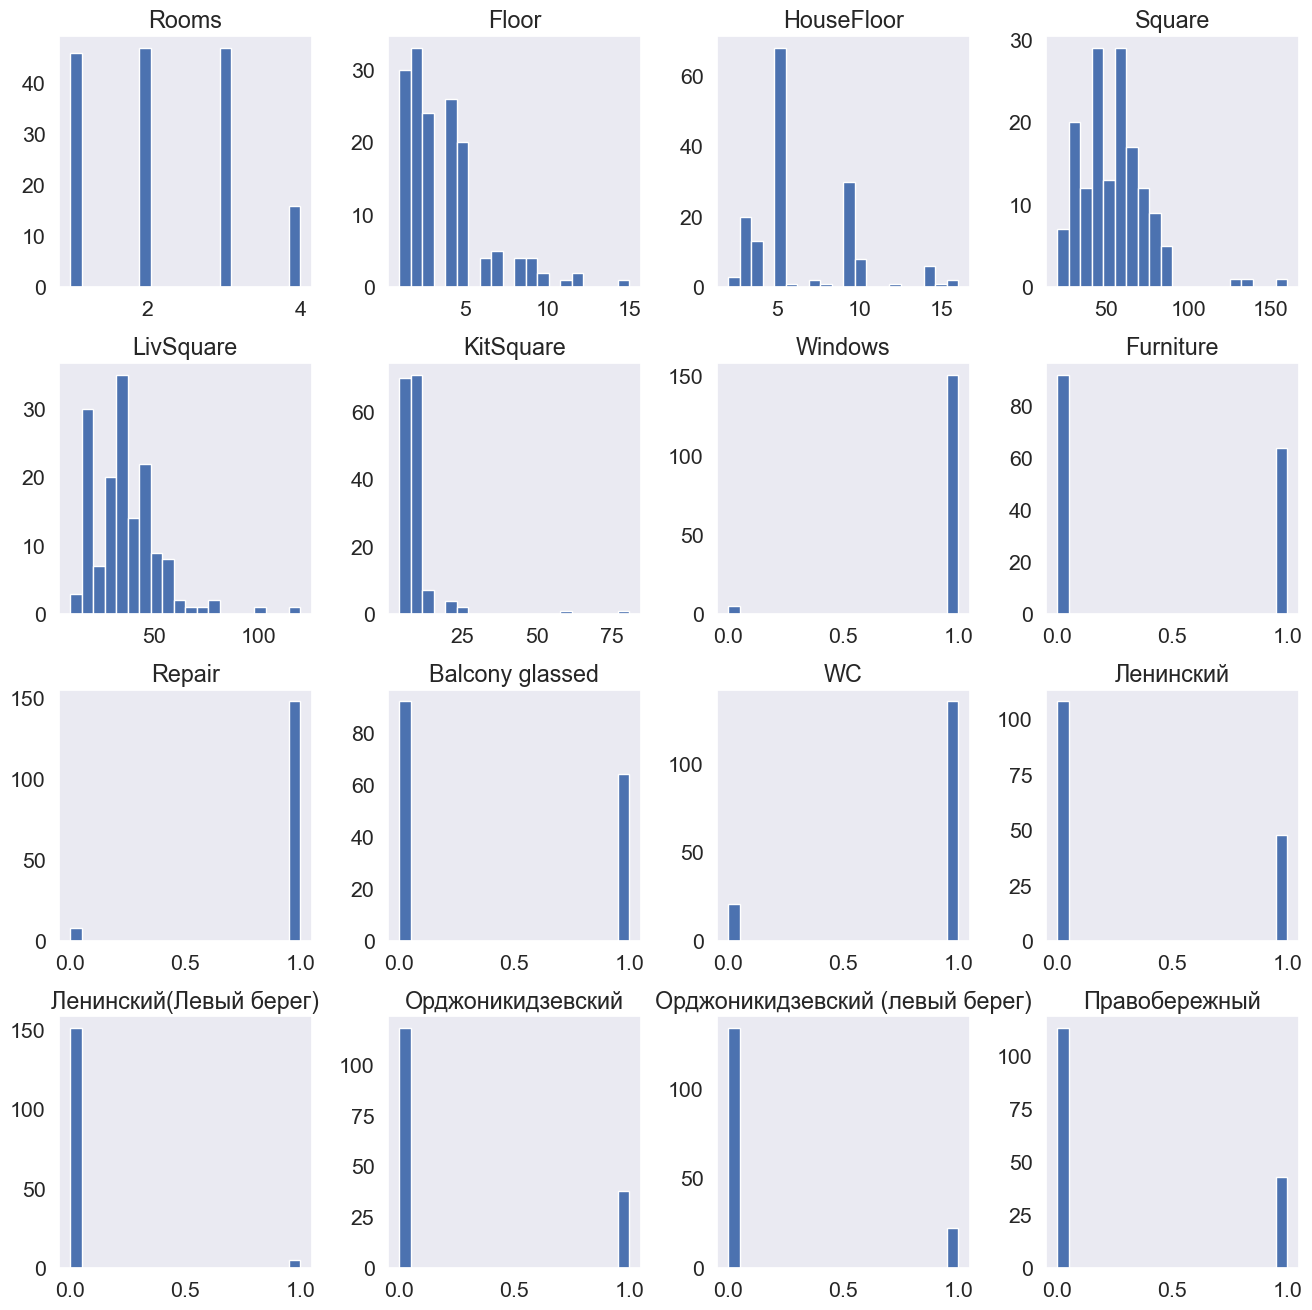

In [199]:
df_num_features.hist(figsize=(16,16),bins=20,grid=False);

Однозначно есть выброс по KitSquare (площадь кухни), т.е. имеются квартиры где площадь кухни, больше общей площади, приведем в соответствие эти данные

In [200]:
condition2=df['KitSquare']>=df['Square']
df.loc[condition2,'KitSquare']

25     20.6
26     22.7
137    81.0
150    60.0
Name: KitSquare, dtype: float64

In [201]:
df.loc[condition2,'KitSquare']=df['KitSquare'].median()
df.loc[condition2,'KitSquare']

25     8.0
26     8.0
137    8.0
150    8.0
Name: KitSquare, dtype: float64

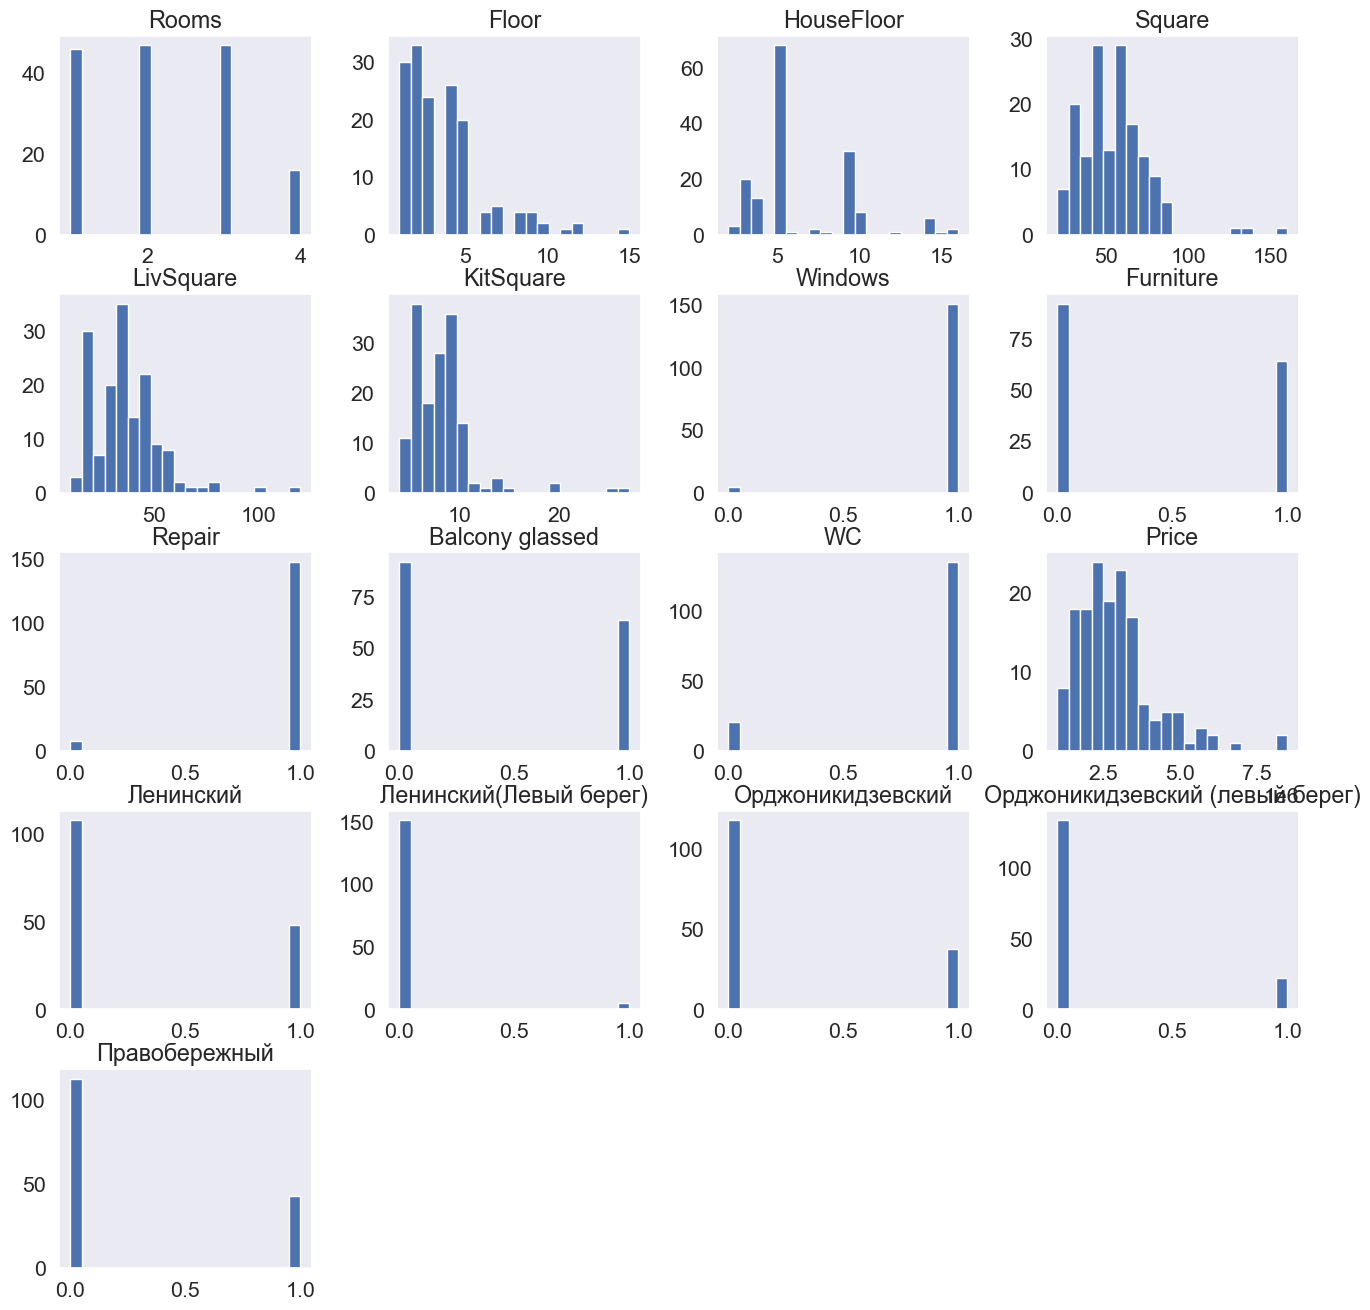

In [202]:
df_num_features=df.select_dtypes(include=['float64','int64','int8','uint8','int32'])
df_num_features.hist(figsize=(16,16),bins=20,grid=False);

#### Анализ целевой переменной

In [203]:
target='Price'


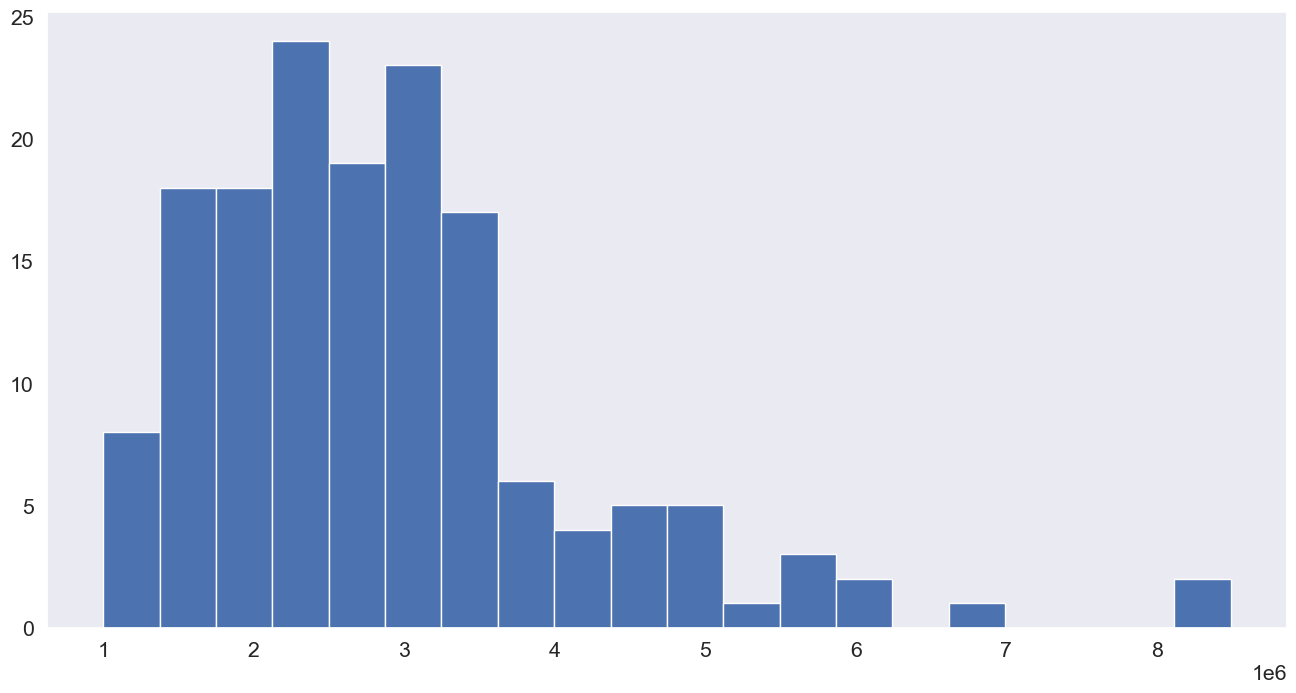

In [204]:
df['Price'].hist(figsize=(16,8),bins=20,grid=False);

In [205]:
target_mean=round(df['Price'].mean(),2)
target_median=df['Price'].median()
target_mode=df['Price'].mode()[0]

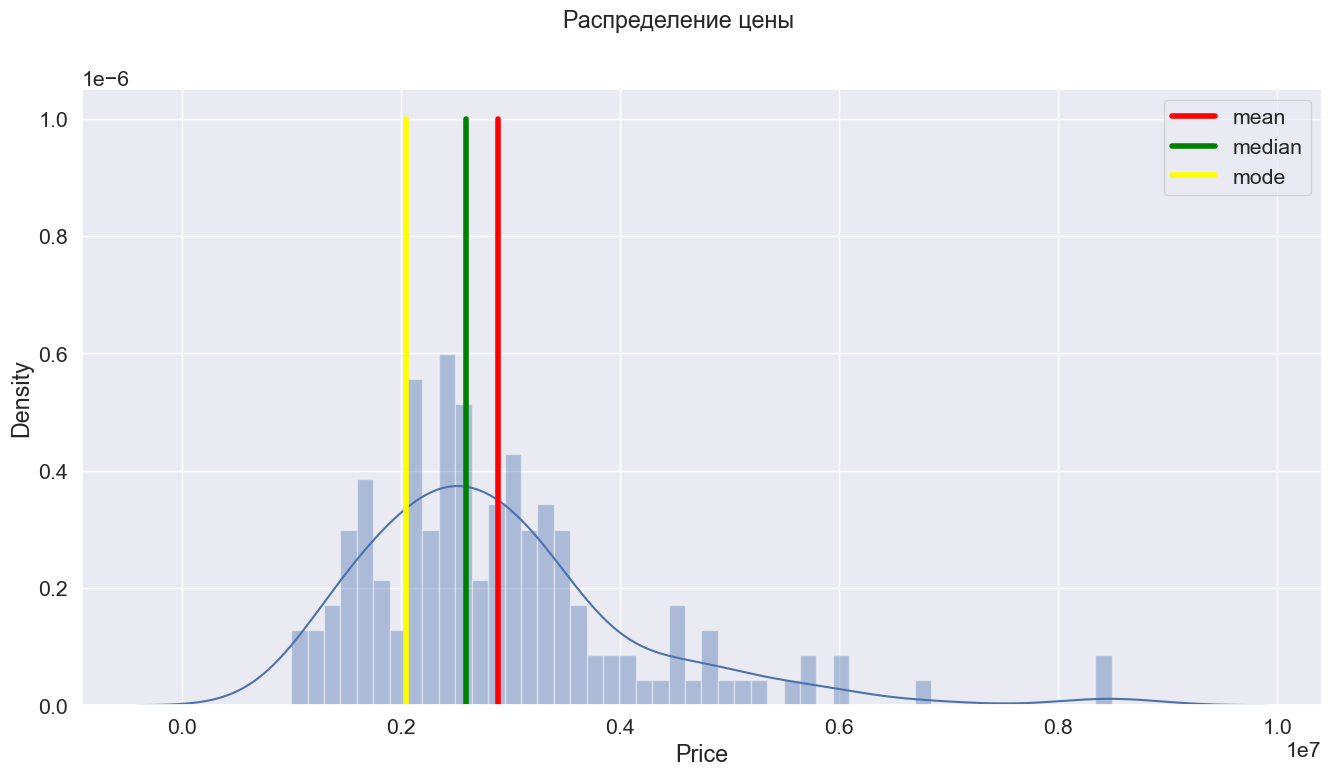

In [206]:
plt.figure(figsize=(16,8))
sns.distplot(df['Price'],bins=50)
y=np.linspace(0,0.000010,10)
plt.plot([target_mean]*10,y/10,label='mean',color='red', linewidth=4)
plt.plot([target_median]*10,y/10, label = 'median',color='green', linewidth=4)
plt.plot([target_mode]*10,y/10,label = 'mode', color='yellow', linewidth=4)
plt.suptitle('Распределение цены ')
plt.legend()
plt.show()

По целевой переменной не требуется обработка

#### Генерация новых признаков

Добавим признак площадь комнаты, который бужет рассчитан исходя из отношения жилой площади к количеству комнат

In [207]:
df['Room_square']=(df['LivSquare'])/(df['Rooms'])
df['Room_square']

0      18.00
1      17.00
2      33.50
3      33.50
4      17.00
       ...  
151    14.50
152    13.75
153    17.50
154    30.00
155    10.75
Name: Room_square, Length: 156, dtype: float64

In [208]:
df['Room_square']=df['Room_square'].fillna((df['Room_square'].mode()[0])) 

In [209]:
df.head()

,Rooms,Floor,HouseFloor,Square,LivSquare,KitSquare,Windows,Furniture,Repair,Balcony glassed,WC,Price,Ленинский,Ленинский(Левый берег),Орджоникидзевский,Орджоникидзевский (левый берег),Правобережный,Room_square
0,1,4,9,32.4,18.0,9.0,1,1,1,0,1,2050000,0,0,1,0,0,18.0
1,1,1,5,32.0,17.0,6.0,1,1,1,0,1,2050000,0,0,0,0,1,17.0
2,1,3,3,31.0,33.5,8.0,1,1,1,1,1,2100000,1,0,0,0,0,33.5
3,1,5,5,30.0,33.5,6.0,1,0,1,0,1,2050000,1,0,0,0,0,33.5
4,1,9,9,30.0,17.0,6.0,1,1,1,1,0,1490000,0,0,0,0,1,17.0


In [210]:
df.dtypes


Rooms                                int64
Floor                                int64
HouseFloor                           int64
Square                             float64
LivSquare                          float64
KitSquare                          float64
Windows                              int64
Furniture                            int64
Repair                               int64
Balcony glassed                      int64
WC                                   int64
Price                                int64
Ленинский                            uint8
Ленинский(Левый берег)               uint8
Орджоникидзевский                    uint8
Орджоникидзевский (левый берег)      uint8
Правобережный                        uint8
Room_square                        float64
dtype: object

EDA закончена, необходимые признаки приведены в соответсвующие типы данных (в данном случае количественные)

Соберем большую часть действий класс,чтобы не дублировать их полностью на тесте

In [211]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.binary_to_numbers_furn_rep_bal=None
        self.binary_to_numbers_wind=None
        self.binary_to_numbers_WC=None
        self.Room_square=None
        #self.PricePerMeter=None
        
    def fit(self, X,y=None):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        # Перевод в бинарный формат
        self.binary_to_numbers_furn_rep_balc = {'да': 1, 'нет': 0}
        self.binary_to_numbers_wind={'пластик':1, 'деревянные':0}
        self.binary_to_numbers_WC={'разд':1, 'совм':0}
       
        
    def transform(self, X):
        """Трансформация данных"""
         #Лишние признаки
         # Type and Adress
        if 'Type' in X.columns:
            X.drop('Type',axis=1, inplace=True)
        if 'Adress' in X.columns:    
            X.drop('Adress',axis=1, inplace=True)
        if 'Id' in X.columns:    
            X.drop('Id',axis=1, inplace=True)

        X['Furniture'] = X['Furniture'].replace(self.binary_to_numbers_furn_rep_balc)
        X['Repair'] = X['Repair'].replace(self.binary_to_numbers_furn_rep_balc)
        X['Balcony glassed'] = X['Balcony glassed'].replace(binary_to_numbers_furn_rep_balc)
        X['Windows']=X['Windows'].replace(self.binary_to_numbers_wind)
        X['WC']=X['WC'].replace(binary_to_numbers_WC)
         #Обработка пропусков
        
         # LivSquare KitSquare
        X[['LivSquare','KitSquare']]= X[['LivSquare','KitSquare']].fillna(self.medians)
       
       
        #Выбросы
        
        # KitSquare
        condition2=X['KitSquare']>=X['Square']
        X.loc[condition2,'KitSquare']=self.medians['KitSquare']
        
       
        # Генерация новых признаков
        
        X['Room_square']=(X['LivSquare'])/(X['Rooms'])
        #X['PricePerMeter']=(X['Price'])/(X['Square']) 
        
       
        return X

#### Отбор признаков

In [212]:
feature_names=['Rooms','Floor','HouseFloor','Square','LivSquare', 'KitSquare','Ленинский','Ленинский(Левый берег)','Орджоникидзевский','Орджоникидзевский (левый берег)','Правобережный','Windows','Furniture','Repair', 'Balcony glassed','WC','Room_square']
feature_names

['Rooms',
 'Floor',
 'HouseFloor',
 'Square',
 'LivSquare',
 'KitSquare',
 'Ленинский',
 'Ленинский(Левый берег)',
 'Орджоникидзевский',
 'Орджоникидзевский (левый берег)',
 'Правобережный',
 'Windows',
 'Furniture',
 'Repair',
 'Balcony glassed',
 'WC',
 'Room_square']

In [213]:
df=df[feature_names+[target]]
df.head()

,Rooms,Floor,HouseFloor,Square,LivSquare,KitSquare,Ленинский,Ленинский(Левый берег),Орджоникидзевский,Орджоникидзевский (левый берег),Правобережный,Windows,Furniture,Repair,Balcony glassed,WC,Room_square,Price
0,1,4,9,32.4,18.0,9.0,0,0,1,0,0,1,1,1,0,1,18.0,2050000
1,1,1,5,32.0,17.0,6.0,0,0,0,0,1,1,1,1,0,1,17.0,2050000
2,1,3,3,31.0,33.5,8.0,1,0,0,0,0,1,1,1,1,1,33.5,2100000
3,1,5,5,30.0,33.5,6.0,1,0,0,0,0,1,0,1,0,1,33.5,2050000
4,1,9,9,30.0,17.0,6.0,0,0,0,0,1,1,1,1,1,0,17.0,1490000


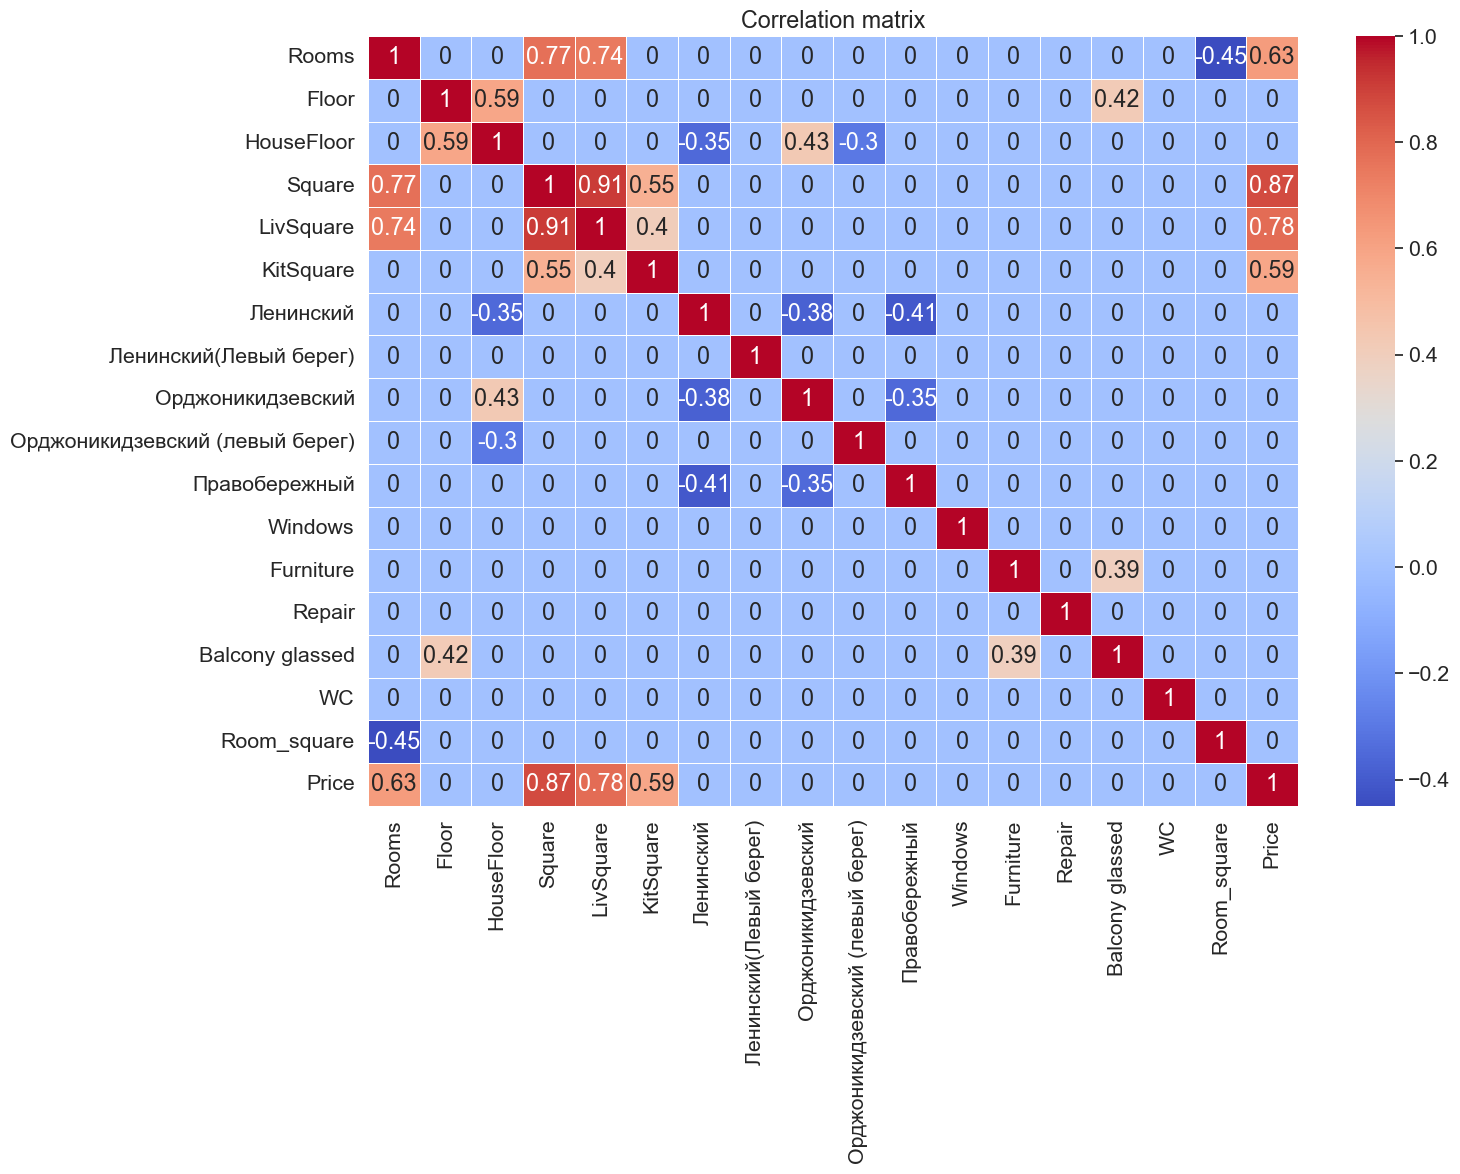

In [214]:
#Построим матрицу корреляций
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

На цену больше всего влияют кол-во комнат и все виды площадей

#### Сохранение датасета

In [215]:
import pickle 

In [216]:
df.to_csv('PREPARED_CITYSTAR_DATASET.csv',index=False,encoding ='utf-8',sep=';')

#### Разделение на train и test

In [217]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
X=df[feature_names]
y=df[target]
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [218]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [219]:
preprocessor = DataPreprocessing()
preprocessor.fit(df)
#preprocessor.fit(test_df)
X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((104, 17), (52, 17), (13, 17))

In [220]:
df[feature_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rooms                            156 non-null    int64  
 1   Floor                            156 non-null    int64  
 2   HouseFloor                       156 non-null    int64  
 3   Square                           156 non-null    float64
 4   LivSquare                        156 non-null    float64
 5   KitSquare                        156 non-null    float64
 6   Ленинский                        156 non-null    uint8  
 7   Ленинский(Левый берег)           156 non-null    uint8  
 8   Орджоникидзевский                156 non-null    uint8  
 9   Орджоникидзевский (левый берег)  156 non-null    uint8  
 10  Правобережный                    156 non-null    uint8  
 11  Windows                          156 non-null    int64  
 12  Furniture             

#### Проверка работы ООП на test

In [221]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rooms                            13 non-null     int64  
 1   Floor                            13 non-null     int64  
 2   HouseFloor                       13 non-null     int64  
 3   Square                           13 non-null     float64
 4   LivSquare                        13 non-null     float64
 5   KitSquare                        13 non-null     float64
 6   Windows                          13 non-null     int64  
 7   Furniture                        13 non-null     int64  
 8   Repair                           13 non-null     int64  
 9   Balcony glassed                  13 non-null     int64  
 10  WC                               13 non-null     int64  
 11  Ленинский                        13 non-null     uint8  
 12  Ленинский(Левый берег)  

In [222]:
test_df.describe()

,Rooms,Floor,HouseFloor,Square,LivSquare,KitSquare,Windows,Furniture,Repair,Balcony glassed,WC,Ленинский,Ленинский(Левый берег),Орджоникидзевский,Орджоникидзевский (левый берег),Правобережный,Room_square
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2.384615,3.384615,5.230769,58.407692,37.384615,7.792308,1.0,0.692308,1.0,0.461538,0.769231,0.307692,0.076923,0.307692,0.076923,0.230769,16.634615
std,1.043908,1.609268,2.278664,31.108371,19.058194,2.219783,0.0,0.480384,0.0,0.518875,0.438529,0.480384,0.277350,0.480384,0.277350,0.438529,6.831939
min,1.000000,1.000000,3.000000,22.000000,12.000000,6.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.333333
25%,2.000000,2.000000,4.000000,42.500000,25.000000,6.000000,1.0,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,2.000000,3.000000,5.000000,48.300000,33.500000,7.000000,1.0,1.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.666667
75%,3.000000,5.000000,5.000000,62.000000,45.000000,8.500000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000
max,4.000000,6.000000,9.000000,136.000000,80.000000,12.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.500000


In [223]:
test_df.head(12)

,Rooms,Floor,HouseFloor,Square,LivSquare,KitSquare,Windows,Furniture,Repair,Balcony glassed,WC,Ленинский,Ленинский(Левый берег),Орджоникидзевский,Орджоникидзевский (левый берег),Правобережный,Room_square
0,3,3,9,99.0,63.5,11.8,1,1,1,1,1,0,0,1,0,0,21.166667
1,3,3,4,80.6,50.0,10.0,1,0,1,0,0,1,0,0,0,0,16.666667
2,3,2,5,47.3,22.0,6.0,1,1,1,0,1,0,0,0,0,1,7.333333
3,4,5,5,62.0,45.0,6.0,1,1,1,0,1,0,0,1,0,0,11.250000
4,4,4,4,136.0,80.0,12.0,1,1,1,1,0,1,0,0,0,0,20.000000
5,1,6,9,31.7,33.5,8.5,1,1,1,1,1,0,0,1,0,0,33.500000
6,1,5,9,22.0,12.0,6.0,1,0,1,1,0,0,0,0,0,1,12.000000
7,1,1,3,31.0,17.0,6.0,1,1,1,1,1,1,0,0,0,0,17.000000
8,2,5,5,48.3,41.0,7.0,1,0,1,0,1,0,0,1,0,0,20.500000
9,2,1,4,56.3,40.0,6.0,1,1,1,0,1,1,0,0,0,0,20.000000


In [224]:
test_df[feature_names]

,Rooms,Floor,HouseFloor,Square,LivSquare,KitSquare,Ленинский,Ленинский(Левый берег),Орджоникидзевский,Орджоникидзевский (левый берег),Правобережный,Windows,Furniture,Repair,Balcony glassed,WC,Room_square
0,3,3,9,99.0,63.5,11.8,0,0,1,0,0,1,1,1,1,1,21.166667
1,3,3,4,80.6,50.0,10.0,1,0,0,0,0,1,0,1,0,0,16.666667
2,3,2,5,47.3,22.0,6.0,0,0,0,0,1,1,1,1,0,1,7.333333
3,4,5,5,62.0,45.0,6.0,0,0,1,0,0,1,1,1,0,1,11.250000
4,4,4,4,136.0,80.0,12.0,1,0,0,0,0,1,1,1,1,0,20.000000
5,1,6,9,31.7,33.5,8.5,0,0,1,0,0,1,1,1,1,1,33.500000
6,1,5,9,22.0,12.0,6.0,0,0,0,0,1,1,0,1,1,0,12.000000
7,1,1,3,31.0,17.0,6.0,1,0,0,0,0,1,1,1,1,1,17.000000
8,2,5,5,48.3,41.0,7.0,0,0,1,0,0,1,0,1,0,1,20.500000
9,2,1,4,56.3,40.0,6.0,1,0,0,0,0,1,1,1,0,1,20.000000


In [225]:
X_train.shape, X_valid.shape, test_df.shape

((104, 17), (52, 17), (13, 17))

#### Применение моделей

Для обучения были выбраны следующие модели: LinearRegression, DecisionTreeRegressor,RandomForestRegressor, GradientBoostingRegressor, кроме линейной регресии все моледи были обработаны через GridSearchCv с использованием наилучших результатов, метрика используемая R2,

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

 Linear Regression

R2:	0.895
RMSE:	441775.86
MSE:	195165910247.436


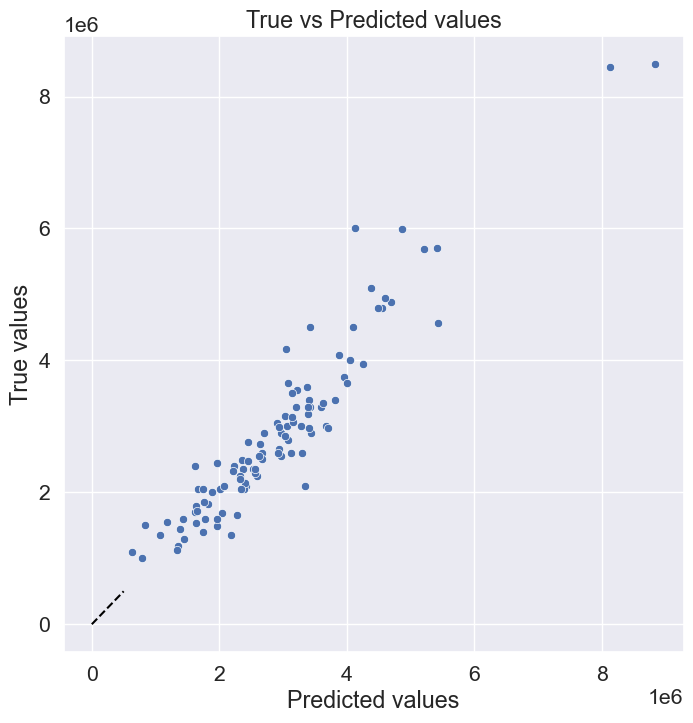

In [227]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_preds=lr.predict(X_train)
evaluate_preds(y_train,y_train_preds)

R2:	0.775
RMSE:	510916.044
MSE:	261035203803.869


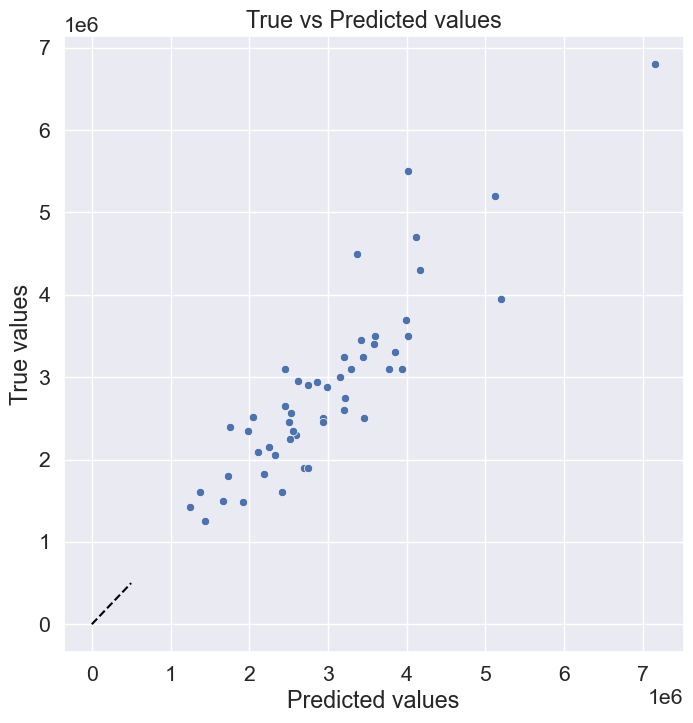

In [228]:
y_valid_preds=lr.predict(X_valid)
evaluate_preds(y_valid,y_valid_preds)

In [229]:

results_ML = {'LinRegr' : pd.Series([0.775], index =['R2']), 
   'DecisionTree' : pd.Series([0.296], index =['R2']),'RandomForest' : pd.Series([0.466], index =['R2']),'GradBoost' : pd.Series([0.595], index =['R2']),} 

results_ML_frame=pd.DataFrame(results_ML)
print(results_ML_frame)

    LinRegr  DecisionTree  RandomForest  GradBoost
R2    0.775         0.296         0.466      0.595


#### Лучший результат показала линейная регрессия, R2 = 0.775

#### Применение модели на тесте

Определяем признаки

In [230]:
feature_names=['Rooms','Floor','HouseFloor','Square','LivSquare', 'KitSquare','Ленинский','Ленинский(Левый берег)','Орджоникидзевский','Орджоникидзевский (левый берег)','Правобережный','Windows','Furniture','Repair', 'Balcony glassed','WC','Room_square']
feature_names

['Rooms',
 'Floor',
 'HouseFloor',
 'Square',
 'LivSquare',
 'KitSquare',
 'Ленинский',
 'Ленинский(Левый берег)',
 'Орджоникидзевский',
 'Орджоникидзевский (левый берег)',
 'Правобережный',
 'Windows',
 'Furniture',
 'Repair',
 'Balcony glassed',
 'WC',
 'Room_square']

In [231]:
y_test_preds=lr.predict(test_df[feature_names])

In [232]:
result = pd.DataFrame()
result=pd.DataFrame({'Id':test_idx, 'Price':pd.Series(y_test_preds)})

In [233]:
result.to_csv('prediction_by_test.csv', index=False)
result.values

array([['0', 5749766.9159659],
       ['1', 4292946.507230356],
       ['2', 2478940.9194255318],
       ['3', 3683618.1843240163],
       ['4', 7322128.323874349],
       ['5', 2445476.337854331],
       ['6', 1280312.4086666047],
       ['7', 1911332.792761859],
       ['8', 2873098.061918004],
       ['9', 3066519.2551150327],
       ['10', 2537768.03113123],
       ['11', 1730546.190185334],
       ['12', 2327308.8346721837]], dtype=object)

#### Результаты предсказания модели

In [234]:
data_test=pd.read_csv('prediction_by_test.csv')
data_test['Price']=data_test['Price'].astype(int)
data_test.head(12)

,Id,Price
0,0,5749766
1,1,4292946
2,2,2478940
3,3,3683618
4,4,7322128
5,5,2445476
6,6,1280312
7,7,1911332
8,8,2873098
9,9,3066519


Имеется тестовый датасет с ответами для сравнения

In [235]:
answer=pd.read_csv('PriceTestExcel.csv')
answer.drop(['Id','Type','Adress','Floor','HouseFloor','Square','LivSquare','KitSquare','Windows','Furniture','Repair','Balcony glassed','WC'],axis=1,inplace=True)
answer=answer.rename(columns={'Price':'oldPrice'})
answer.head()

,Rooms,District,oldPrice
0,3,Орджоникидзевский,5990000
1,3,Ленинский,4050000
2,3,Правобережный,2400000
3,4,Орджоникидзевский,2950000
4,4,Ленинский,8100000


#### Сравним результаты предсказания с настоящими (тест)

In [236]:
result = pd.concat([data_test, answer], axis=1, join='inner')
result['diff']=(result['oldPrice'])-(result['Price'])
result['div%']=(result['oldPrice'])/(result['Price'])*100-100
order = ['Id','Rooms','District','oldPrice','Price','diff','div%']
result=result.reindex(columns=order)
result.columns = ['Id', 'Rooms', 'District', 'KnownPrice','PredictedPrice','diff','div%']
result.head(13)

,Id,Rooms,District,KnownPrice,PredictedPrice,diff,div%
0,0,3,Орджоникидзевский,5990000,5749766,240234,4.178153
1,1,3,Ленинский,4050000,4292946,-242946,-5.659191
2,2,3,Правобережный,2400000,2478940,-78940,-3.184426
3,3,4,Орджоникидзевский,2950000,3683618,-733618,-19.915692
4,4,4,Ленинский,8100000,7322128,777872,10.623578
5,5,1,Орджоникидзевский,1800000,2445476,-645476,-26.394698
6,6,1,Правобережный,1190000,1280312,-90312,-7.053906
7,7,1,Ленинский,2300000,1911332,388668,20.334929
8,8,2,Орджоникидзевский,2300000,2873098,-573098,-19.947040
9,9,2,Ленинский,3850000,3066519,783481,25.549524


#### График сравнения известной цены и предсказанной

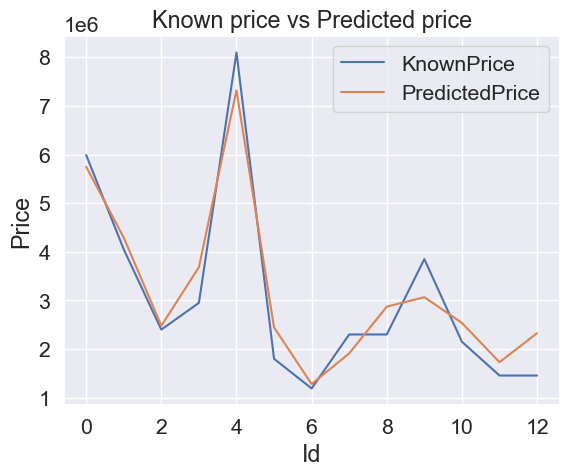

In [237]:
result.plot(x='Id', y=['KnownPrice','PredictedPrice'])
plt.xlabel('Id')
plt.ylabel('Price')
plt.title('Known price vs Predicted price')
plt.show()